<a href="https://colab.research.google.com/github/jcjcchang/2nd-ML100Days/blob/master/homework/Day_008_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [0]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
#dir_data = './data/'
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [3]:
app_train = pd.read_csv('gdrive/My Drive/draft-ds/application_train.csv')
'''
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()
'''

"\nf_app = os.path.join(dir_data, 'application_train.csv')\nprint('Path of read in data: %s' % (f_app))\napp_train = pd.read_csv(f_app)\napp_train.head()\n"

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [12]:
print(app_train[['CNT_CHILDREN','AMT_INCOME_TOTAL']].head())
print(app_train['CNT_CHILDREN'].max())

   CNT_CHILDREN  AMT_INCOME_TOTAL
0             0          202500.0
1             0          270000.0
2             0           67500.0
3             0          135000.0
4             0          121500.0
19


In [17]:
#1
"""
Your code here
"""
cut_rule = [0,1,2,5,app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()


(-0.001, 1.0]    276490
(1.0, 2.0]        26749
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [26]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL','TARGET']
grouped_df.mean()

,AMT_INCOME_TOTAL,TARGET
CNT_CHILDREN_GROUP,,
"(-0.001, 1.0]",168361.253573,0.079797
"(1.0, 2.0]",172580.748737,0.087218
"(2.0, 5.0]",173626.303191,0.099291
"(5.0, 19.0]",147910.714286,0.214286


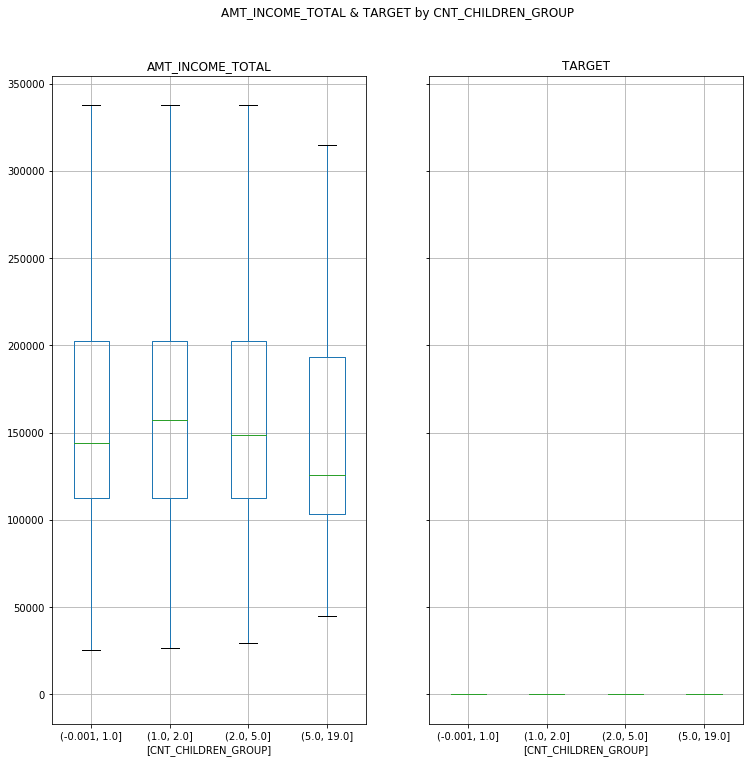

In [24]:
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL','TARGET']
plt_by = ['CNT_CHILDREN_GROUP']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('AMT_INCOME_TOTAL & TARGET by CNT_CHILDREN_GROUP')
plt.show()

請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [33]:
#3
"""
Your code here
"""
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']

AMT_INCOME_TOTAL_mean = app_train['AMT_INCOME_TOTAL'].mean()
AMT_INCOME_TOTAL_std = app_train['AMT_INCOME_TOTAL'].std()


app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - AMT_INCOME_TOTAL_mean )/ AMT_INCOME_TOTAL_std)

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.142129
1,270000.0,0.426791
2,67500.0,-0.427195
3,135000.0,-0.142533
4,121500.0,-0.199466
